In [ ]:
A company has customer data that contains 8 columns of customer details and another table having name customer_policy data contains the policy details of the customer. 

The company intends to offer some discount in premium for certain customers. To do that they ask their Data scientist team to get some information. Hence, following tasks DS team decided to perform:

1. Add the column names to both datasets:

i. Column Name for customer details table:

           customer_id, 

           Gender,

           age, 

           driving licence present,

           region code, 

           previously insured, 

           vehicle age 

           and vehicle damage, in respective order. 

ii. Column Name for customer_policy table:

           customer_id, 

           annual premium (in Rs), 

           sales channel code, 

           vintage and response. 

In [55]:
# Q.1: Reading Data
import pandas
table1 = pandas.read_csv("customer_details.csv")
table2 = pandas.read_csv("customer_policy_details.csv")
print(table1.head())
print("==============================================================")
print(table2.head())

     0       1     2    3     4    5          6    7
0  1.0    Male  44.0  1.0  28.0  0.0  > 2 Years  Yes
1  2.0    Male  76.0  1.0   3.0  0.0   1-2 Year   No
2  3.0    Male  47.0  1.0  28.0  0.0  > 2 Years  Yes
3  4.0    Male  21.0  1.0  11.0  1.0   < 1 Year   No
4  5.0  Female  29.0  1.0  41.0  1.0   < 1 Year   No
     0        1      2      3    4
0  1.0  40454.0   26.0  217.0  1.0
1  2.0  33536.0   26.0  183.0  0.0
2  3.0  38294.0   26.0   27.0  1.0
3  4.0  28619.0  152.0  203.0  0.0
4  5.0  27496.0  152.0   39.0  0.0


In [ ]:
2. Checking and Cleaning Data Quality:

i. Null values

Generate a summary of count of all the null values column wise
Drop Null values for customer_id because central tendencies for id’s is not feasible.
Replace all null values for numeric columns by mean. 
Replace all null values for Categorical value by mode.
ii. Outliers

Generate a summary of count of all the outliers column wise
Replace all outlier values for numeric columns by mean. 
(Hint1: for outlier treatment use IQR method as follows:

For example: for a column X calculate Q1 = 25th percentile and Q3 = 75th percentile then IQR = Q3 – Q1 ) then to check outlier, anything lower than a Q1 – 1.5IQR or greater than Q3 + 1.5 IQR would be an outlier

Hint2: For getting percentile value, explore pd.describe() function)

iii. White spaces

Remove white spaces
iv. case correction(lower or upper, any one) 

v. Convert nominal data (categorical) into dummies 

for future modeling use if required
vi. Drop Duplicates (duplicated rows)

In [ ]:
# Q.2: Checking and Cleaning the data
# 2.1 Null values

# 2.1.1 Table1
table1_labels={'0':'customer_id', '1':'gender', '2':'age', '3':'driving_licence_presence',
'4':'region_code', '5':'previously_insured', '6':'vehicle_age', '7':'vehicle_damage'}


# 2.1.1.1 counting the null values of each column of table1
for i in range(table1.shape[1]):
    print(f"number of cells of {table1_labels[str(i)]} with null values = {table1[str(i)].isnull().sum()}")


table1.info()

# 2.1.1.2 dropping rows with null customer_id of table1
table1.dropna(subset=['0'],inplace=True)
print(f"number of cells of {table1_labels[str(0)]} with null values = {table1[str(0)].isnull().sum()}")


 
# 2.1.1.3 replacing all null values for numeric columns by mean of table1
for i in range(2,6):
    table1[str(i)].fillna(table1[str(i)].mean(),inplace=True)
    print(f"number of cells of {table1_labels[str(i)]} with null values = {table1[str(i)].isnull().sum()}")
    


# 2.1.1.4 replacing all null values for Categorical value by mode of table1
for i in [1,6,7]:
    table1[str(i)].fillna(table1[str(i)].mode()[0],inplace=True)
    print(f"number of cells of {table1_labels[str(i)]} with null values = {table1[str(i)].isnull().sum()}")
    


# 2.1.2 Table2
table2_labels={'0':'customer_id', '1':'annual_premium_INR', '2':'sales_channel_code', '3':'vintage',
'4':'response'}

# 2.1.2.1 counting the null values of each column of table2
for i in range(table2.shape[1]):
    print(f"number of cells of {table2_labels[str(i)]} with null values is {table2[str(i)].isnull().sum()}")

table2.info()

# 2.1.2.2 dropping rows with null customer_id of table2
table2.dropna(subset=['0'],inplace=True)
print(f"number of cells of {table1_labels[str(0)]} with null values = {table2[str(0)].isnull().sum()}")

# 2.1.2.3 replacing all null values for numeric columns by mean of table2
for i in range(1,5):
    table2[str(i)].fillna(table2[str(i)].mean(),inplace=True)
    print(f"number of cells of {table2_labels[str(i)]} with null values = {table2[str(i)].isnull().sum()}")

# 2.2 Outliers

# 2.2.1 Table1

table1_limits = {}
for i in range(2,6):
    computations = table1[str(i)].describe(percentiles=[.25, .75])
    mean = computations.values[1]
    Q1 = computations.values[4] # 25%
    Q3 = computations.values[6] # 75%
    IQR = Q3-Q1
    ll = Q1 - 1.5*IQR # lower limit
    hl = Q3 + 1.5*IQR # higher limit
    table1_limits[str(i)] = (ll,hl)
table1_limits

# 2.2.1.1 generating a summary of count of all the outliers column wise of table1 (only for numeric columns)
table1_outliers = {'2':0, '3':0, '4':0, '5':0}

for j in table1.index:
    for i in range(2,6):
        if (table1_limits[str(i)][0]!=table1_limits[str(i)][1]) and (table1.loc[j, str(i)]>table1_limits[str(i)][1] or table1.loc[j, str(i)]<table1_limits[str(i)][0]):
            table1_outliers[str(i)]+=1

table1_outliers

# 2.2.1.2 replacing all outlier values for numeric columns by mean for table 1
# though as can be seen above, there are no outliers at all!, anyways the code is following
for j in table1.index:
    for i in range(2,6):
        if table1.loc[j, str(i)]<table1_limits[str(i)][0]:
            table1.loc[j, str(i)]=table1[str(i)].mean()
        if table1.loc[j, str(i)]>table1_limits[str(i)][1]:
            table1.loc[j, str(i)]=table1[str(i)].mean()

# 2.2.2 Table2
table2_limits = {}

for i in range(1,5):
    computations = table2[str(i)].describe(percentiles=[.25, .75])
    mean = computations.values[1]
    Q1 = computations.values[4] # 25%
    Q3 = computations.values[6] # 75%
    IQR = Q3-Q1
    ll = Q1 - 1.5*IQR # lower limit
    hl = Q3 + 1.5*IQR # higher limit
    table2_limits[str(i)] = (ll,hl)
table2_limits

# 2.2.2.1 generating a summary of count of all the outliers column wise of table2 (only for numeric columns)
table2_outliers = {'1':0, '2':0, '3':0, '4':0, '5':0}

for j in table2.index:
    for i in range(1,5):
        if (table2_limits[str(i)][0]!=table2_limits[str(i)][1]) and (table2.loc[j, str(i)]>table2_limits[str(i)][1] or table2.loc[j, str(i)]<table2_limits[str(i)][0]):
            table2_outliers[str(i)]+=1

table2_outliers

# 2.2.2.2 replacing all outlier values for numeric columns by mean for table 2
for j in table2.index:
    for i in range(1,5):
        if table2.loc[j, str(i)]<table2_limits[str(i)][0]:
            table2.loc[j, str(i)]=table2[str(i)].mean()
        if table2.loc[j, str(i)]>table2_limits[str(i)][1]:
            table2.loc[j, str(i)]=table2[str(i)].mean()
            
# 2.3.1 Remove Whitespaces for table1
table1.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
 
# 2.3.2 Remove Whitespaces for table2
table2.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# 2.4.1 case correction for table1
table1.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
 
# 2.4.2 case correction for table2
table2.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
 
# 2.5.1 converting categorical data into dummy variables for table1
# 2.5.2 converting categorical data into dummy variables for table2

# 2.6.1 dropping duplicate rows for table1
table1.drop_duplicates(inplace=True)
# 2.6.2 dropping duplicate rows for table2
table2.drop_duplicates(inplace=True)

number of cells of customer_id with null values = 0
number of cells of gender with null values = 0
number of cells of age with null values = 0
number of cells of driving_licence_presence with null values = 0
number of cells of region_code with null values = 0
number of cells of previously_insured with null values = 0
number of cells of vehicle_age with null values = 0
number of cells of vehicle_damage with null values = 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 380723 entries, 0 to 381108
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       380723 non-null  float64
 1   1       380723 non-null  object 
 2   2       380723 non-null  float64
 3   3       380723 non-null  float64
 4   4       380723 non-null  float64
 5   5       380723 non-null  float64
 6   6       380723 non-null  object 
 7   7       380723 non-null  object 
dtypes: float64(5), object(3)
memory usage: 34.2+ MB
number of cells of customer_id 

In [ ]:
3. Create a Master table for future use. Join the customer table and customer_policy table to get a master table using customer_id in both tables.

(Hint: use pd.merge() function)

In [57]:
# Q.3: Creating a master table
data = pandas.merge(table1, table2, on='0',)
labels={'0':'customer_id', '1_x':'gender', '2_x':'age', '3_x':'driving_licence_presence',
'4_x':'region_code', '5':'previously_insured', '6':'vehicle_age', '7':'vehicle_damage',
'1_y':'annual_premium_INR', '2_y':'sales_channel_code', '3_y':'vintage', '4_y':'response'}
data.rename(columns=labels, inplace=True)
data

,customer_id,gender,age,driving_licence_presence,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium_INR,sales_channel_code,vintage,response
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
380331,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No,30170.0,26.0,88.0,0.0
380332,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No,40016.0,152.0,131.0,0.0
380333,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No,35118.0,160.0,161.0,0.0
380334,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,74.0,0.0


In [ ]:
4. Company needs some important information from the master table to make decisions for future growth.They needs following information:

 i. Gender wise average annual premium

ii. Age wise average annual premium

iii. Is your data balanced between the genders?

          (Hint: Data is balanced if number of counts in each group is approximately same)

iv. Vehicle age wise average annual premium.

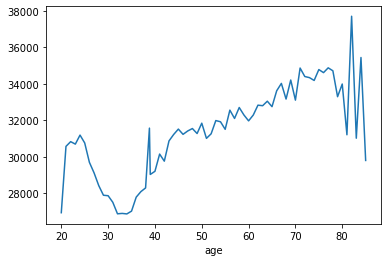

male to female ration is 1.18
generally, the standard is: 
 balanced data ratio: 1.0
 slightly balanced data ratio: 1.22-1.5 
 imbalanced data ratio: 4.0-9.0


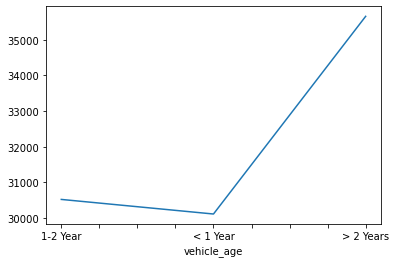

In [44]:
# Q.4: getting information

# 4.1 Gender wise average annual premium
data.groupby('gender')['annual_premium_INR'].mean()

print("==============================================================")

# 4.2 Age wise average annual premium
result4_2 = data.groupby('age')['annual_premium_INR'].mean()
import matplotlib.pyplot as pyplot
result4_2.plot()
pyplot.show()

print("==============================================================")

# 4.3 Is your data balanced between the genders?
print(f"male to female ration is {round(data['gender'].value_counts()[0]/data['gender'].value_counts()[1],2)}")
print(f"generally, the standard is: \n balanced data ratio: {50/50}\n slightly balanced data ratio: {round(55/45,2)}-{60/40} \n imbalanced data ratio: {80/20}-{90/10}")

print("==============================================================")

# 4.4 Vehicle age wise average annual premium.
result4_4 = data.groupby('vehicle_age')['annual_premium_INR'].mean()
import matplotlib.pyplot as pyplot
result4_4.plot()
pyplot.show()

In [ ]:
5. Is there any relation between Person Age and annual premium?

Hint: use correlation function (Correlation describes the relationship between two variables). 

Correlation coefficient < -0.5           - Strong negative relationship

Correlation coefficient > 0.5            -  Strong positive relationship

0.5 < Correlation coefficient < 0.5   - There is no relationship. 

In [43]:
# Q.5 : Is there any relation between Person Age and annual premium?
print("==============================================================")
n = data['age'].corr(data['annual_premium_INR'])
if n<-0.5:
    print("Strong negative relationship")
if n>0.5:
    print("Strong positive relationship")
if n>-0.5 and n<0.5:
    print("There is no relationship!")
print("==============================================================")

There is no relationship!
